# First Fundamental Theorem of Calculus (FTC)

This notebook demonstrates the **First Fundamental Theorem of Calculus (FTC)** 
using two classic functions:

1. $f(x) = x^2$  
2. $f(x) = \cos(x)$

---

## What is the FTC?

The FTC states that for a continuous function $f(x)$:

$
F(x) = \int_a^x f(t)\, dt \quad \Longrightarrow \quad F'(x) = f(x)
$

In other words:
- The definite integral  $\int_a^x f(t) dt$ defines an **accumulated area function**.
- The derivative of that accumulated area function is the original function itself.

---

## What do we do in this notebook?

- Use **`sympy`** to:
  - Derive the symbolic definite integral.
  - Take its derivative to verify that it matches the original function.

- Use **`scipy.integrate`** to:
  - Compute the numerical value of the definite integral for specific intervals.
  - Check that it matches the symbolic result.

- Use **`matplotlib`** to:
  - Plot the original function $f(x)$.
  - Plot the area under the curve as a shaded region.
  - Plot the accumulated area function $F(x)$.
  - Visually verify that $F'(x) = f(x)$.

---

## Requirements

- `numpy`
- `sympy`
- `scipy`
- `matplotlib`

---

## Goal

By the end of this notebook you should:
- See how the definite integral and derivative link together.
- Understand how the FTC connects local change (derivative) with global accumulation (integral).
- Be able to verify symbolic and numeric consistency and interpret the graph.


In [1]:
import sympy as sp
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

#### 1. $f(x) = x^2$  

In [2]:
x = sp.symbols('x')
f = x**2
F = sp.integrate(f, (x, 0, x))
print("Accumulated area function F(x):", F)

Accumulated area function F(x): x**3/3


In [3]:
f_func = sp.lambdify(x, f, 'numpy')
F_func = sp.lambdify(x, F, 'numpy')

In [8]:
X = np.linspace(0, 4, 200)
Y_f = f_func(X)
Y_F = F_func(X)

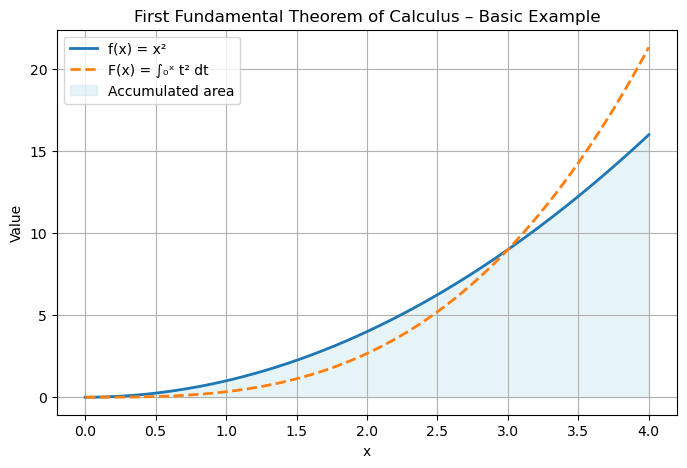

In [9]:
plt.figure(figsize=(8,5))
plt.plot(X, Y_f, label='f(x) = x²', lw=2)
plt.plot(X, Y_F, label='F(x) = ∫₀ˣ t² dt', lw=2, linestyle='--')
plt.fill_between(X, 0, Y_f, where=(X>=0), color='lightblue', alpha=0.3, label='Accumulated area')

plt.title('First Fundamental Theorem of Calculus – Basic Example')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### 2. $f(x) = \cos(x)$

In [10]:
x = sp.symbols('x')
f = sp.cos(x)
F = sp.integrate(f, (x, 0, x))
print("Accumulated area function F(x):", F)

Accumulated area function F(x): sin(x)


In [11]:
f_func = sp.lambdify(x, f, 'numpy')
F_func = sp.lambdify(x, F, 'numpy')

In [12]:
X = np.linspace(0, 4*np.pi, 400)
Y_f = f_func(X)
Y_F = F_func(X)

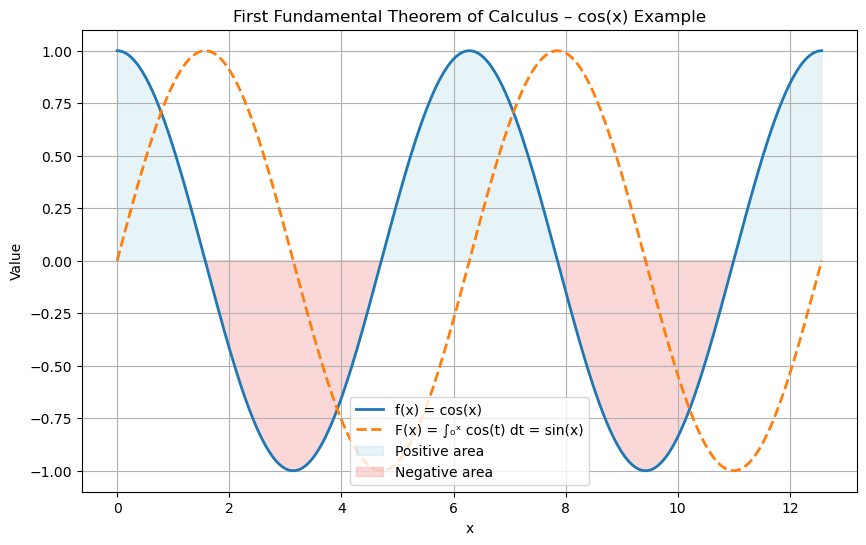

In [13]:
plt.figure(figsize=(10,6))
plt.plot(X, Y_f, label='f(x) = cos(x)', lw=2)
plt.plot(X, Y_F, label='F(x) = ∫₀ˣ cos(t) dt = sin(x)', lw=2, linestyle='--')
plt.fill_between(X, 0, Y_f, where=(Y_f>0), color='lightblue', alpha=0.3, label='Positive area')
plt.fill_between(X, 0, Y_f, where=(Y_f<0), color='lightcoral', alpha=0.3, label='Negative area')

plt.title('First Fundamental Theorem of Calculus – cos(x) Example')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

##  Interpretation – How to read these FTC examples

---

### 1. Basic polynomial: $f(x) = x^2$

- **Original function:**  
  $f(x) = x^2$ shows how the local rate of change grows quadratically.
- **Accumulated area:**  
  $F(x) = \int_0^x t^2 dt = \frac{x^3}{3}$.  
  The area under the curve grows faster than the original function because it sums up all the previous values of $f(x)$.

- **Key check:**  
  The slope of the accumulated area curve $F(x)$ should match the height of $f(x)$ at each point.  
  This shows that:
  $
  \frac{d}{dx} F(x) = f(x)
  $

- **Visual sign:**  
  The two curves have the same *trend* in local change: where $f(x)$ increases faster, $F(x)$ gets steeper.

---

### 2️. Periodic function: $f(x) = \cos(x)$

- **Original function:**  
  $f(x) = \cos(x)$ oscillates between positive and negative values, creating alternating positive and negative area segments.

- **Accumulated area:**  
  $F(x) = \int_0^x \cos(t) dt = \sin(x)$.  
  Since $\cos(x)$ is periodic, the accumulated area does not grow without bound but instead oscillates, showing how positive and negative areas cancel out.

- **Key check:**  
  The derivative of the accumulated area function $F'(x) = \cos(x)$ must match the original function exactly, showing the FTC holds for periodic functions too.

- **Visual sign:**  
  You can see where the original function crosses zero (changes sign), the area function reaches peaks or troughs because the local accumulation switches from adding to subtracting.

---

## What to look for in both cases

| Checkpoint | What it means |
|------------|----------------|
| **F(x) starts at 0** | No accumulated area at the lower limit. |
| **Slope match** | The derivative of the area function equals the original function: FTC in action. |
| **Correct sign behavior** | Positive and negative regions are properly shown with shading, matching how area accumulates or cancels. |
| **No sudden jumps** | Curves should be continuous and smooth, showing proper symbolic and numerical consistency.

---

## Key takeaway

The FTC shows how local rates of change (derivatives) and global accumulation (definite integrals) are mathematically linked.  
Visualizing this relationship helps you see how functions, their area under the curve, and their local slopes interact – not just symbolically, but also numerically and geometrically.

